In [1]:
import os
import sys
from matplotlib import pyplot as plt
from PIL import Image
from skimage.io import imread, imshow, imsave
from skimage import img_as_float, img_as_ubyte
from numpy import roll, clip, round, dstack
import numpy as np
from skimage import color

In [2]:
import math

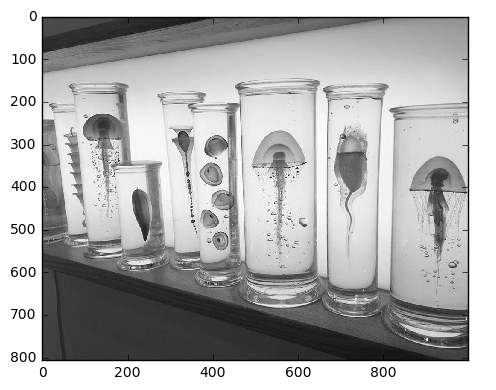

In [3]:
my_img = imread('lab1/JbYo.jpg')
grey_img = color.rgb2gray(my_img)
imshow(grey_img)
plt.show()

In [4]:
r = grey_img.shape[0]
c = grey_img.shape[1]

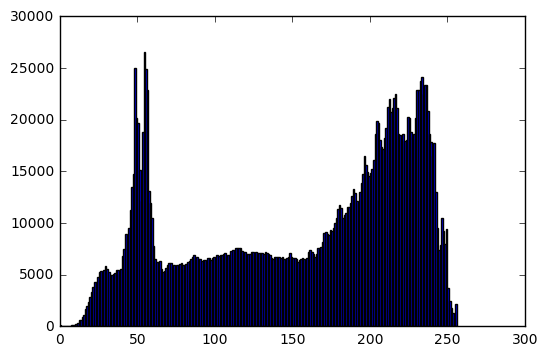

In [5]:
from matplotlib.pyplot import hist
values, bin_edges, patches = hist(my_img.ravel(), bins=range(257))
plt.show()

In [6]:
#def most_contrast():
grey_img.min(), grey_img.max(), r, round(r/2), c

(0.0025000000000000001, 1.0, 807, 404.0, 1000)

In [7]:
grey_img[:]

array([[ 0.37221451,  0.33299882,  0.32515569, ...,  0.56429608,
         0.56429608,  0.58782549],
       [ 0.33299882,  0.29378314,  0.28594   , ...,  0.54468824,
         0.54468824,  0.56821765],
       [ 0.34084196,  0.30162627,  0.29378314, ...,  0.54468824,
         0.54468824,  0.56821765],
       ..., 
       [ 0.29241412,  0.24927686,  0.23751216, ...,  0.22884784,
         0.24061255,  0.2837498 ],
       [ 0.29633569,  0.25319843,  0.23751216, ...,  0.22884784,
         0.24061255,  0.27590667],
       [ 0.32770824,  0.28849255,  0.27672784, ...,  0.27590667,
         0.27982824,  0.31512235]])

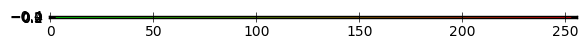

In [8]:
colormap_u = np.array([[[i,255-i,0] for i in range(256)]],dtype=np.uint8)
imshow(colormap_u)
plt.show()

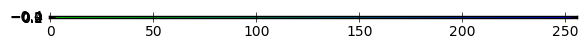

In [9]:
colormap_v = np.array([[[0,255-i,i] for i in range(256)]],dtype=np.uint8)
imshow(colormap_v)
plt.show()

In [10]:
def yuv2rgb(y, u, v):
    rd = y[:,:] + 1.402*(v[:,:] - 128)
    gr = y[:,:] - 0.34414*(u[:,:] - 128) - 0.71414*(v[:,:] - 128)
    bl = y[:,:] + 1.772*(u[:,:] - 128)
    #rb = y + 1.2803*v
    #gr = y - 0.2148*u - 0.3805*v
    #bl = y + 2.1279*u
    return rd, gr, bl
def rgb2yuv(rgb):
    #rd = img[:, :, 0]
    #gr = img[:, :, 1]
    #bl = img[:, :, 2]
    #y = 0.299*rb + 0.587*gr + 0.114*bl
    #u = -0.168*rd - 0.3313*gr + 0.5*bl + 128
    #v = 0.5*rd - 0.4187*gr - 0.0813*bl + 128
    y = 0.299*rgb[:,:,0] + 0.587*rgb[:,:,1] + 0.114*rgb[:,:,2]
    u = -0.168*rgb[:,:,0] - 0.3313*rgb[:,:,1] + 0.5*rgb[:,:,2] + 128
    v = 0.5*rgb[:,:,0] - 0.4187*rgb[:,:,1] - 0.0813*rgb[:,:,2] + 128
    #y = 0.2126*rd + 0.7152*gr + 0.0722*bl
    #u = -0.0999*rb - 0.3360*gr + 0.4360*bl
    #v = 0.6150*rb - 0.5586*gr - 0.0563*bl
    return y, u, v
def make_u(rgb):
    #return np.array([clip((-0.1687*rgb[:,:,0] - 0.3313*rgb[:,:,1] + 0.5*rgb[:,:,2] + 128), 0, 256)], dtype=np.uint8)
    #return np.array([clip((-0.1687*rgb[:,:,0] - 0.3313*rgb[:,:,1] + 0.5*rgb[:,:,2] + 128), 0, 256)])
    return (-0.1687*rgb[:,:,0] - 0.3313*rgb[:,:,1] + 0.5*rgb[:,:,2] + 128)
def make_v(rgb):
    #return np.array([clip((0.5*rgb[:,:,0] - 0.4187*rgb[:,:,1] - 0.0813*rgb[:,:,2] + 128), 0, 256)], dtype=np.uint8)
    #return np.array([clip((0.5*rgb[:,:,0] - 0.4187*rgb[:,:,1] - 0.0813*rgb[:,:,2] + 128), 0, 256)])
    return (0.5*rgb[:,:,0] - 0.4187*rgb[:,:,1] - 0.0813*rgb[:,:,2] + 128)
def make_y(rgb):
    return (0.299*rgb[:,:,0] + 0.587*rgb[:,:,1] + 0.114*rgb[:,:,2])
def uv2rgb(m, u, v):
    r = (0.587*m[:,:,1] + 0.114*m[:,:,2] + 1.402*(v[:,:] - 128)) / (1-0.299)
    g = (0.299*m[:,:,0] + 0.114*m[:,:,2] - 0.34414*(u[:,:] - 128) - 0.71414*(v[:,:] - 128)) / (1-0.587)
    b = (0.299*m[:,:,0] + 0.587*m[:,:,1] + 1.772*(u[:,:] - 128)) / (1-0.114)
    return r, g, b

In [34]:
def entropy0(one, two):
    sum_one = 0
    sum_two = 0
    size = len(one)*len(one[0])
    for i in range(len(one)):
        for j in range(len(one[0])):
            sum_one += (one[i,j]/size)*math.log(one[i,j]/size)
            sum_two += (two[i,j]/size)*math.log(two[i,j]/size)
    print(sum_one, sum_two)
    return -math.fabs(sum_one - sum_two)
def entropy1(one, two):
    sum_one = 0
    sum_two = 0
    size = len(one)*len(one[0])
    for i in range(len(one)):
        for j in range(len(one[0])):
            #pi = math.fabs(one[i,j]-two[i,j])/size
            p1 = (one[i,j]/size)
            p2 = (two[i,j]/size)
            #res += pi* math.log2(pi)
            sum_one += p1* math.log2((p1-p2)**2)
            #sum_two += p2* math.log2(p2)
    print(sum_one, sum_two)
            #sum_two += (two[i,j]/size)*math.log(two[i,j]/size)
    return math.fabs(sum_one - sum_two)
def entropy2(one, two):
    sum_one = 0
    sum_two = 0
    size = len(one)*len(one[0])
    for i in range(len(one)):
        for j in range(len(one[0])):
            #pi = math.fabs(one[i,j]-two[i,j])/size
            p1 = math.fabs(one[i,j]/size)
            p2 = math.fabs(two[i,j]/size)
            #res += pi* math.log2(pi)
            sum_one += p1* math.log2(p1)
            sum_two += p2* math.log2(p2)
    print(sum_one, sum_two)
    return math.fabs(sum_one - sum_two)
def entropy3(one, two):
    res = 0
    size = len(one)*len(one[0])
    for i in range(len(one)):
        for j in range(len(one[0])):
            res += ((one[i,j]-two[i,j])/size)*math.log((one[i,j]-two[i,j])/size)
    return math.fabs(sum_one - sum_two)
def entropy4(one,two):
    res1 = 0 
    res2 = 0
    size = one.shape[0]*one.shape[1]
    values1, bin_edges1, patches1 = hist(one.ravel(), bins=range(257))
    values2, bin_edges2, patches2 = hist(two.ravel(), bins=range(257))
    for i in range(len(values1)):
        p1 = math.fabs(values1[i]/size)
        p2 = math.fabs(values2[i]/size)
        #print(p1, p2)
        if (p1>0):
            res1 += p1* math.log2(p1)
        if (p2>0):
            res2 += p2* math.log2(p2)
    print(res1, res2)
    return math.fabs(res1-res2)
def msi(one, two):
    e = 0
#    avg = 0
#    for i in range(one.shape[0]):
#        for j in range(one.shape[1]):
#            avg += one[0][i][j]
#    avg = avg / (one.shape[0]*one.shape[1])
    for i in range(len(one)):
        for j in range(len(one[0])):
            e += round(one[i][j] - two[i][j])**2
    e = (e / (one.shape[0]*one.shape[1] - 1))**(1/2)
    return e

In [12]:
def OneChanCompress1(m):
    r = m.shape[0]
    c = m.shape[1]
    for i in range (int(round(r/2))):
        for j in range (int(round(c/2))):
            four = []
            four.append(m[i*2, j*2])
            if (j*2+1 < c):
                four.append(m[i*2, j*2+1])
            if (i*2+1 < r):
                four.append(m[i*2+1, j*2])
            if (j*2+1 < c and i*2+1 < r):
                four.append(m[i*2+1, j*2+1])
            #n.append(clip((sum(four) / len(four)), 0, 1))
            #avg = clip((sum(four) / len(four)), 0, 1)
            avg = sum(four) / len(four)
            #print(avg)
            m[i*2, j*2] = avg
            if (j*2+1 < c):
                m[i*2, j*2+1] = avg
            if (i*2+1 < r):
                m[i*2+1, j*2] = avg
            if (j*2+1 < c and i*2+1 < r):
                m[i*2+1, j*2+1] = avg
    return m
def OneChanUncompress1(m):
    array = []
    for i in range (m.shape[0]):
        array.append([])
        for j in range (m.shape[1]):
            array[i*2].append(m[i][j])        
            array[i*2].append(m[i][j])
        array.append(array[i*2])
    return array

In [13]:
def decimation(channal):
    i=0
    while i<=len(channal):
        np.delete(channal, (i), axis=0)
        np.delete(channal, (i), axis=1)
        i+=2
    return channal
def compress1(im):
    avg_u = OneChanCompress1(make_u(im))
    #avg_u = make_u(im)
    half_avg_u = decimation(avg_u)
    #print(len(avg_u[0]),len(avg_u[0][0]))
    print(avg_u)
    avg_v = OneChanCompress1(make_v(im))
    #avg_v = make_v(im)
    half_avg_v = decimation(avg_v)
    y = make_y(im)
    r = (0.587*im[:,:,1] + 0.114*im[:,:,2] + 1.402*(half_avg_v - 128)) / (1-0.299)
    #print(len(r), len(r[0]), len(r[0][0]))
    g = (0.299*im[:,:,0] + 0.114*im[:,:,2] - 0.34414*(half_avg_u - 128) - 0.71414*(half_avg_v - 128)) / (1-0.587)
    b = (0.299*im[:,:,0] + 0.587*im[:,:,1] + 1.772*(half_avg_u - 128)) / (1-0.114)
    new_im = dstack((r,g,b))
    #rd = y[:,:] + 1.402*(half_avg_v[:,:] - 128)
    #gr = y[:,:] - 0.34414*(half_avg_u[:,:] - 128) - 0.71414*(half_avg_v[:,:] - 128)
    #bl = y[:,:] + 1.772*(half_avg_u[:,:] - 128)
    #new_im2 = dstack((rd,gr,bl))
    #print(im[0][0], new_im[0][0])
    return new_im.astype('uint8')
    #return np.array([clip((r,g,b), 0, 256)], dtype=np.uint8)
def compress(im):
    #make_u(im)
    #print(len(im),len(im[0]))
    #print(im)
    y, u, v = rgb2yuv(im)
    #avg_u = OneChanCompress(make_u(im))
    #half_avg_u = decimation(avg_u)
    #print(len(avg_u[0]),len(avg_u[0][0]))
    #avg_v = OneChanCompress(make_v(im))
    #half_avg_v = decimation(avg_v)
    u = (OneChanCompress1(u))
    v = (OneChanCompress1(v))
    #r, g, b = yuv2rgb(make_y(im), half_avg_u, half_r, g, b = yuv2rgb(y, u, v)avg_v)
    r, g, b = yuv2rgb(y, u, v)
    new_im = dstack((r,g,b))
    #print(im[0][0], new_im[0][0])
    #imsave('new_ready.jpg',new_im)
    #res = np.array([clip((r,g,b), 0, 256)], dtype=np.uint8)
    #imsave('1236.jpg',dstack((r[0],g,b)))
    return new_im.astype('uint8')
def uncompress1(im):
    treex_avg_u = OneChanUncompress1(make_u(im))
    treex_avg_v = OneChanUncompress1(make_v(im))
    print(len(treex_avg_u), len(treex_avg_u[0]))
    r = (0.587*im[:,:,1] + 0.114*im[:,:,2] + 1.402*(treex_avg_v[0] - 128)) / (1-0.299)
    g = (0.299*im[:,:,0] + 0.114*im[:,:,2] - 0.34414*(treex_avg_u[0] - 128) - 0.71414*(treex_avg_v[0] - 128)) / (1-0.587)
    b = (0.299*im[:,:,0] + 0.587*im[:,:,1] + 1.772*(treex_avg_u[0] - 128)) / (1-0.114)
    return dstack((r, g, b)).astype('uint8')
def uncompress(im):
    treex_avg_u = OneChanUncompress1(make_u(im))
    treex_avg_v = OneChanUncompress1(make_v(im))
    #print(len(treex_avg_u), len(treex_avg_u[0]))
    r, g, b = yuv2rgb(make_y(im), treex_avg_u, treex_avg_v)
    new_img = dstack((r, g, b)).astype('uint8')
    #imsave('f_new_img.jpg', new_img)
    return new_img

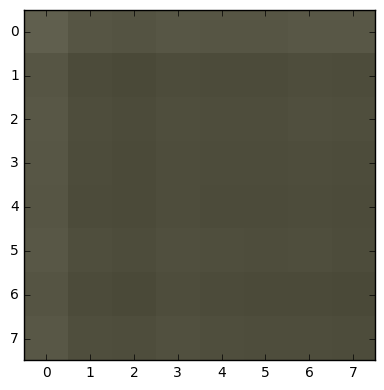

In [14]:
compacted0 = compress(my_img)
imshow(compacted0[0:8, 0:8])
plt.show()

[[ 118.8313  118.8313  118.8313 ...,  116.1443  116.1443  116.1443]
 [ 118.8313  118.8313  118.8313 ...,  116.1443  116.1443  116.1443]
 [ 118.8313  118.8313  118.8313 ...,  116.1443  116.1443  116.1443]
 ..., 
 [ 121.3374  121.3374  121.3374 ...,  108.939   108.939   108.939 ]
 [ 121.3374  121.3374  121.3374 ...,  108.939   108.939   108.939 ]
 [ 121.3374  121.3374  121.3374 ...,  108.939   108.939   108.939 ]]
807 807


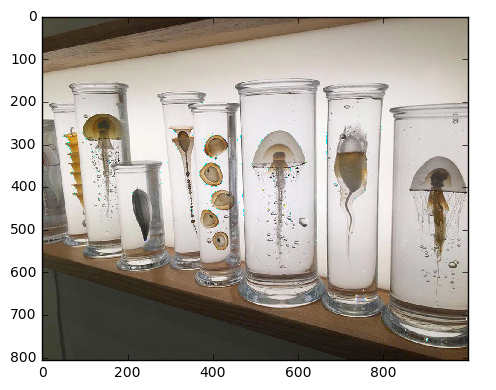

In [15]:
compacted1 = compress1(my_img)
#compacted1 = cripple(img, -1)
#compacted2 = cripple(img, -2)
print(len(compacted1), len(my_img))
imshow(compacted1)
plt.show()

In [16]:
'''
uncompacted1 = uncompress1(compacted1)
imshow(uncompacted1)
plt.show()
#uncompacted1 = cripple(compacted1, 1)
#uncompacted2 = cripple(compacted2, 2)
np.array_equal(my_img, compacted1)
'''

1614 2000


TypeError: unsupported operand type(s) for -: 'list' and 'int'

In [17]:
def OneCompress(m):
    res = np.zeros((len(m), len(m[0])))
    for i in range (int(round(r/2))):
        for j in range (int(round(c/2))):
            four = []
            four.append(m[i*2, j*2])
            if (j*2+1 < c):
                four.append(m[i*2, j*2+1])
            if (i*2+1 < r):
                four.append(m[i*2+1, j*2])
            if (j*2+1 < c and i*2+1 < r):
                four.append(m[i*2+1, j*2+1])
            avg = sum(four) / len(four)
            res[i*2, j*2] = avg
            if (j*2+1 < c):
                res[i*2, j*2+1] = avg
            if (i*2+1 < r):
                res[i*2+1, j*2] = avg
            if (j*2+1 < c and i*2+1 < r):
                res[i*2+1, j*2+1] = avg
    return res
def OneUncompress(m):
    array = np.zeros((m.shape[0]*2, m.shape[1]*2))
    for i in range (m.shape[0]):
        for j in range (m.shape[1]):
            array[i*2, i*2], array[i*2+1, i*2], array[i*2, i*2+1], array[i*2+1, i*2+1] = m[i, j]
    return array
def compressOne(im):
    half_avg_u = OneCompress(make_u(im))
    half_avg_v = OneCompress(make_v(im))
    y = make_y(im)
    #r = (0.587*im[:,:,1] + 0.114*im[:,:,2] + 1.402*(half_avg_v - 128)) / (1-0.299)
    #print(len(r), len(r[0]), len(r[0][0]))
    #g = (0.299*im[:,:,0] + 0.114*im[:,:,2] - 0.34414*(half_avg_u - 128) - 0.71414*(half_avg_v - 128)) / (1-0.587)
    #b = (0.299*im[:,:,0] + 0.587*im[:,:,1] + 1.772*(half_avg_u - 128)) / (1-0.114)
    #new_im = dstack((r,g,b))
    rd = y[:,:] + 1.402*(half_avg_v[:,:] - 128)
    gr = y[:,:] - 0.34414*(half_avg_u[:,:] - 128) - 0.71414*(half_avg_v[:,:] - 128)
    bl = y[:,:] + 1.772*(half_avg_u[:,:] - 128)
    new_im2 = dstack((rd,gr,bl))
    #print(im[0][0], new_im[0][0])
    return new_im2.astype('uint8')
    #return np.array([clip((r,g,b), 0, 256)], dtype=np.uint8)

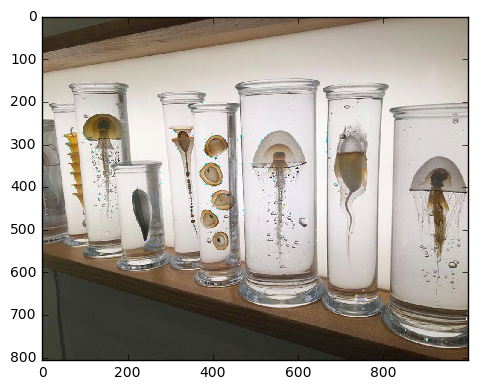

In [18]:
compressed2 = compressOne(my_img)
imshow(compressed2)
plt.show()

In [19]:
def compressF(m):
    #sizeX = len(m)/2 if len(m)%2 == 0 else (len(m)/2)+1
    #sizeY = len(m[0])/2 if len(m)%2 == 0 else (len(m[0])/2)+1
    #res = np.zeros((sizeX, sizeY))
    res = np.zeros((round(m.shape[0]/2), round(m.shape[1]/2)))
    for i in range (int(round(m.shape[0]/2))):
        for j in range (int(round(m.shape[1]/2))):
            four = []
            four.append(m[i*2, j*2])
            if ((j*2)+1 < m.shape[1]):
                four.append(m[i*2, j*2+1])
            if ((i*2)+1 < m.shape[0]):
                four.append(m[i*2+1, j*2])
            if ((j*2)+1 < m.shape[1] and (i*2)+1 < m.shape[0]):
                four.append(m[i*2+1, j*2+1])
            res[i, j] = sum(four) / len(four)
    return res
def uncompressF(m, sizeX, sizeY):
    #array = np.zeros((m.shape[0]*2, m.shape[1]*2))
    array = np.zeros((sizeX+1, sizeY+1))
    for i in range (m.shape[0]):
        for j in range (m.shape[1]):
            a = m[i, j]
            array[i*2+1-1, j*2+1-1] = a
            array[i*2, j*2] = m[i, j]
            #if ((j*2)+1 < sizeX):
            if ((i*2)+1 < sizeX):
                array[i*2+1, j*2] = m[i, j]
            #if ((j*2)+1 < sizeY):
            if ((j*2)+1 < sizeY):
                array[i*2, j*2+1] = m[i, j]
            #if ((i*2)+1 < sizeX & (j*2)+1 < sizeY):
            if ((j*2)+1 < sizeY and (i*2)+1 < sizeX):
                array[i*2+1, j*2+1] = m[i, j]
    return array[0:sizeX, 0:sizeY]
def decimationF(im):
    half_avg_u = compressF(make_u(im))
    #print(half_avg_u[0:10, 0:10])
    avg_u = uncompressF(half_avg_u, im.shape[0], im.shape[1])
    #print(avg_u)
    half_avg_v = compressF(make_v(im))
    avg_v = uncompressF(half_avg_v, im.shape[0], im.shape[1])
    y = make_y(im)
    rd = y[:,:] + 1.402*(avg_v[:,:] - 128)
    gr = y[:,:] - 0.34414*(avg_u[:,:] - 128) - 0.71414*(avg_v[:,:] - 128)
    bl = y[:,:] + 1.772*(avg_u[:,:] - 128)
    return dstack((rd, gr, bl)).astype('uint8')
    #y = make_y(im)
    #r = (0.587*im[:,:,1] + 0.114*im[:,:,2] + 1.402*(avg_v - 128)) / (1-0.299)
    #print(len(r), len(r[0]), len(r[0][0]))
    #g = (0.299*im[:,:,0] + 0.114*im[:,:,2] - 0.34414*(avg_u - 128) - 0.71414*(avg_v - 128)) / (1-0.587)
    #b = (0.299*im[:,:,0] + 0.587*im[:,:,1] + 1.772*(avg_u - 128)) / (1-0.114)
    #new_im = dstack((r,g,b))
    #rd = y[:,:] + 1.402*(half_avg_v[:,:] - 128)
    #gr = y[:,:] - 0.34414*(half_avg_u[:,:] - 128) - 0.71414*(half_avg_v[:,:] - 128)
    #bl = y[:,:] + 1.772*(half_avg_u[:,:] - 128)
    #new_im2 = dstack((rd,gr,bl))
    #print(im[0][0], new_im[0][0])
    #r = (0.587*im[:,:,1] + 0.114*im[:,:,2] + 1.402*(avg_v[0] - 128)) / (1-0.299)
    #g = (0.299*im[:,:,0] + 0.114*im[:,:,2] - 0.34414*(avg_u[0] - 128) - 0.71414*(avg_v[0] - 128)) / (1-0.587)
    #b = (0.299*im[:,:,0] + 0.587*im[:,:,1] + 1.772*(avg_u[0] - 128)) / (1-0.114)
    
    #return np.array([clip((r,g,b), 0, 256)], dtype=np.uint8)

/home/nikon-cook/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:5: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


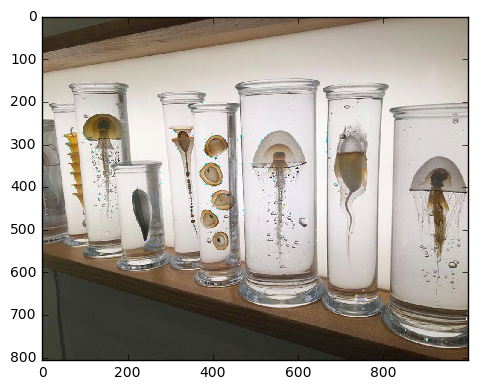

In [20]:
new_im = decimationF(my_img)
imshow(new_im)
imsave('unreal2.png', new_im)
#print(new_im[770:807, 970:1000])
plt.show()

In [21]:
one_u = make_u(my_img[0:807, 0:807])
two_u = make_u(new_im[0:807, 0:807])
msi(one_u, two_u)

2.2126447959061686

In [22]:
entropy0(one_u, two_u) 

-1046.23813843 -1047.96266946


-1.7245310316479845

In [65]:
# entropy1(one_u, two_u) # to show that it's wrong

In [24]:
entropy2(one_u, two_u) 

-1509.4025738974 -1511.8905462719051


2.487972374505034

In [55]:
entropy4(one_u, two_u) 

-4.129718051627284 -4.3605512770060635


0.23083322537877926

In [26]:
one_u = make_u(my_img[0:807, 0:807])
two_u = make_u(new_im[0:807, 0:807])
msi(one_u, two_u)

2.2126447959061686

[ 0. -0.  1.  0. -3. -2. -2. -1.  1.  3.  0.  4. -1. -1. -0.  0.  1.  1.
 -0. -3.]


In [61]:
def trash(img):
    #получение каналов u и v исходного изображения
    y, u, v = rgb2yuv(img)
    avg_u = OneChanCompress1(u)
    avg_v = OneChanCompress1(v)
    #децимация
    half_avg_u = decimation(avg_u)
    half_avg_v = decimation(avg_v)
    #вычисление среднеквадратичной ошибки
    #msi = msi(u, avg_u)
    #перевод в rgb
    #r, g, b = rgb(half_avg_u, half_avg_v)
    #img2 = dstack((r[0],g[0],b[0])).astype('uint8')
    
    #получение каналов u и v разворачиваемого изображения
    #разворачивание каналов
    #u2 = make_u(img2)
    #v2 = make_v(img2)
    treex_avg_u = OneChanUncompress1(half_avg_u)
    treex_avg_v = OneChanUncompress1(half_avg_v)
    #вычисление среднеквадратичной ошибки
    #msi2 = msi(u2, treex_avg_u)
    res_msi1 = msi(u, half_avg_u)
    res_msi2 = msi(u, treex_avg_u)
    print(res_msi1, res_msi2)
    #перевод в rgb 
    #print(treex_avg_u)
    #r, g, b = yuv2rgb(y, treex_avg_u, treex_avg_v) #WRONG STR 
    #list indices must be integers or slices, not tuple
    #out_img = dstack((r[0], g[0], b[0])).astype('uint8')
    return res_msi1
trash(my_img)

0.0 9.88694592967


0.0

In [37]:
def cripple(img, n):
    new_img = img.copy()
    if n>0:
        for i in range(n):
            print('uncompressed')
            #print(new_img)
            new_img = uncompress(new_img)
    else:
        for i in range(n*(-1)):
            print('compressed')
            new_img = compress(new_img)
    return(new_img)

In [62]:
compressed = OneChanCompress1(grey_img)
compressed[0:10, 0:4]

array([[ 0.50069765,  0.50069765,  0.04971725,  0.04971725],
       [ 0.50069765,  0.50069765,  0.04971725,  0.04971725],
       [ 0.02781382,  0.02781382,  0.02073706,  0.02073706],
       [ 0.02781382,  0.02781382,  0.02073706,  0.02073706],
       [ 0.0433198 ,  0.0433198 ,  0.05312373,  0.05312373],
       [ 0.0433198 ,  0.0433198 ,  0.05312373,  0.05312373],
       [ 0.05063863,  0.05063863,  0.04769745,  0.04769745],
       [ 0.05063863,  0.05063863,  0.04769745,  0.04769745],
       [ 0.03986745,  0.03986745,  0.04182824,  0.04182824],
       [ 0.03986745,  0.03986745,  0.04182824,  0.04182824]])

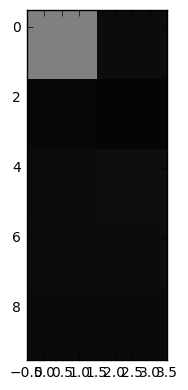

In [64]:
imshow(compressed[0:10, 0:4])
plt.show()

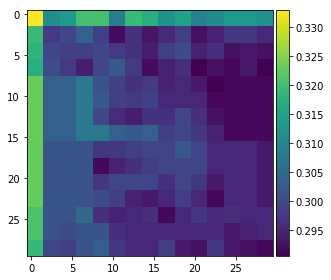

In [39]:
imshow(compressed[0:30,0:30])

In [45]:
grey_img[0:10, 0:4],compressed[0:10, 0:4]

(array([[ 0.33299882,  0.33299882,  0.3114302 ,  0.3114302 ],
        [ 0.33299882,  0.33299882,  0.3114302 ,  0.3114302 ],
        [ 0.31927333,  0.31927333,  0.29770471,  0.29770471],
        [ 0.31927333,  0.31927333,  0.29770471,  0.29770471],
        [ 0.31829294,  0.31829294,  0.29966549,  0.29966549],
        [ 0.31829294,  0.31829294,  0.29966549,  0.29966549],
        [ 0.31731255,  0.31731255,  0.30064588,  0.30064588],
        [ 0.31731255,  0.31731255,  0.30064588,  0.30064588],
        [ 0.3231949 ,  0.3231949 ,  0.30358706,  0.30358706],
        [ 0.3231949 ,  0.3231949 ,  0.30358706,  0.30358706]]),
 array([[ 0.33299882,  0.33299882,  0.3114302 ,  0.3114302 ],
        [ 0.33299882,  0.33299882,  0.3114302 ,  0.3114302 ],
        [ 0.31927333,  0.31927333,  0.29770471,  0.29770471],
        [ 0.31927333,  0.31927333,  0.29770471,  0.29770471],
        [ 0.31829294,  0.31829294,  0.29966549,  0.29966549],
        [ 0.31829294,  0.31829294,  0.29966549,  0.29966549],
      

In [39]:
def bright_lower(img, QP):
    #x = img_as_float(img)
    x = img.astype('float64')
    #print(x[0:1, 0:4])
    #print('was x______________________')
    FQ = np.round(x/QP)
    #print(FQ[0:1, 0:4])
    #print('was FQ______________________')
    y = FQ * QP
    #print(y[0:1, 0:4])
    #print('was y_______________________')
    #y = clip(y, 0, 1)
    y = y.astype('uint8')
    y = clip(y, 0, 255)
    #y = img_as_ubyte(y)
    return y    

In [27]:
def bright_lower(img, QP):
    #x = img_as_float(img)
    x = img.astype('float64')
    FQ = round(x/QP)
    y = FQ * QP
    #y = clip(y, 0, 1)
    y = y.astype('uint8')
    y = clip(y, 0, 255)
    #y = img_as_ubyte(y)
    return y

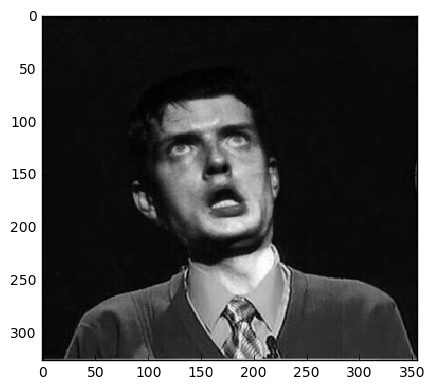

In [30]:
img = imread('lab1/hw.jpg')
grey_img = color.rgb2gray(img)
imshow(grey_img)
plt.show()

In [42]:
imshow(img)
img3 = img_as_ubyte(color.rgb2gray(img))
b8 = bright_lower(img3, 256)
b7 = bright_lower(img3, 128)
b6 = bright_lower(img3, 64)
b5 = bright_lower(img3, 32)
b4 = bright_lower(img3, 16)
b3 = bright_lower(img3, 8)

/home/nikon-cook/anaconda3/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))


In [43]:
print('\n',msi(img3, b3),'\n',
msi(img3, b4),'\n',
msi(img3, b5),'\n',
msi(img3, b6),'\n',
msi(img3, b7))

/home/nikon-cook/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:72: RuntimeWarning: overflow encountered in ubyte_scalars



 132.648509973 
 215.489364277 
 105.020907975 
 110.186426513 
 76.864549645


In [44]:
entropy4(img3, b3)

-5.2884009483286105 -2.976428755079898


2.3119721932487125

In [45]:
entropy4(img3, b4)

-5.2884009483286105 -2.3543896157492425


2.934011332579368

In [46]:
entropy4(img3, b5)

-5.2884009483286105 -1.8228455423060297


3.465555406022581

In [47]:
entropy4(img3, b6)

-5.2884009483286105 -1.3521708105638073


3.9362301377648032

In [48]:
entropy4(img3, b7)

-5.2884009483286105 -0.6735617455200618


4.6148392028085485

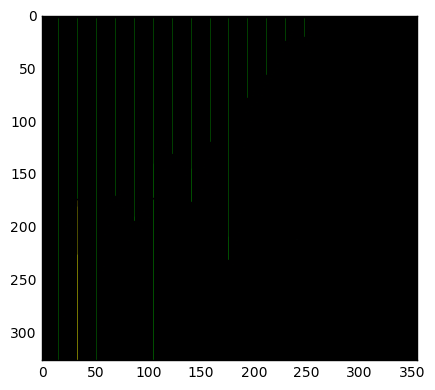

In [49]:
imshow(b8)
plt.show()

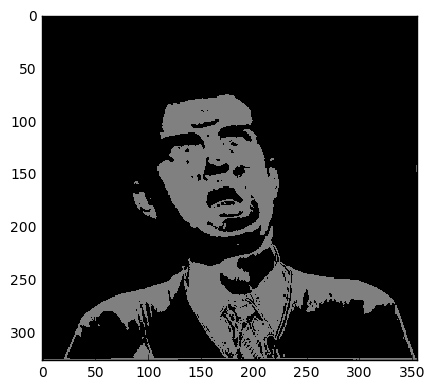

In [50]:
imshow(b7)
plt.show()

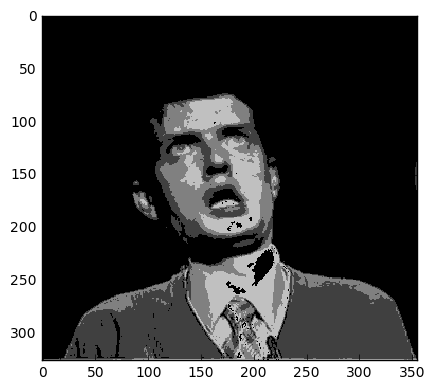

In [51]:
imshow(b6)
plt.show()

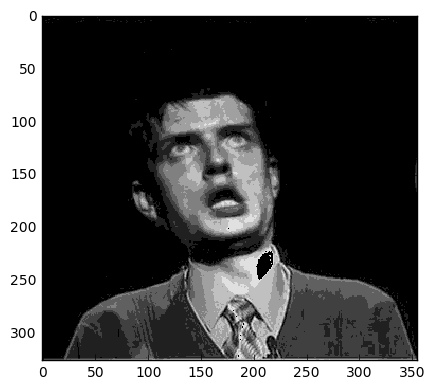

In [52]:
imshow(b5)
plt.show()

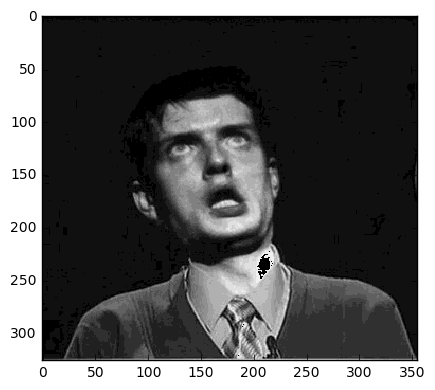

In [53]:
imshow(b4)
plt.show()

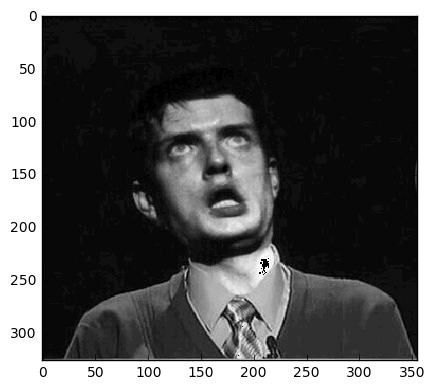

In [54]:
imshow(b3)
plt.show()

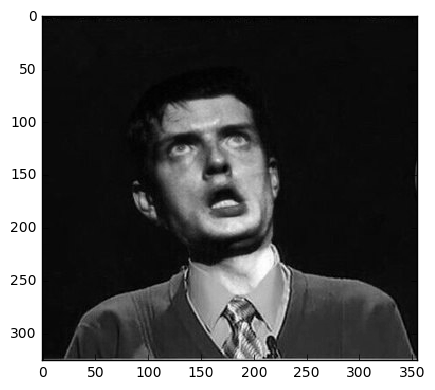

In [68]:
imshow(img3)
plt.show()

In [89]:
b3[0:100, 0:4]

array([[[224, 224,   0],
        [224, 224,   0],
        [224, 224,   0],
        [224, 224,   0]],

       [[224, 224,   0],
        [224, 224,   0],
        [224, 224,   0],
        [224, 224,   0]],

       [[224, 224,   0],
        [224, 224,   0],
        [224, 224,   0],
        [224, 224,   0]],

       ..., 
       [[224, 224,   0],
        [224, 224,   0],
        [224, 224,   0],
        [224, 224,   0]],

       [[224, 224,   0],
        [224, 224,   0],
        [224, 224,   0],
        [224, 224,   0]],

       [[224, 224,   0],
        [224, 224,   0],
        [224, 224,   0],
        [224, 224,   0]]], dtype=uint8)

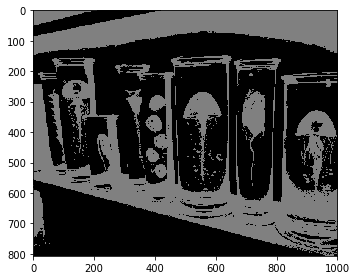

In [79]:
m1 = bright_lower(img_as_ubyte(grey_img), 128)
imshow(m1)

In [151]:
m1[0:10, 0:4]

array([[128, 128, 128, 128],
       [128, 128, 128, 128],
       [128, 128, 128, 128],
       [128, 128, 128, 128],
       [128, 128, 128, 128],
       [128, 128, 128, 128],
       [128, 128, 128, 128],
       [128, 128, 128, 128],
       [128, 128, 128, 128],
       [128, 128, 128, 128]], dtype=uint8)

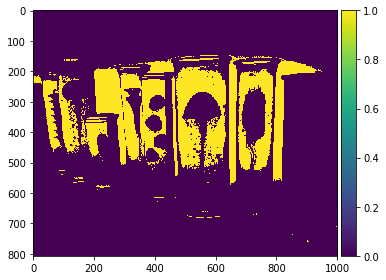

In [152]:
m2 = bright_lower(grey_img, 0.25)
imshow(m2)

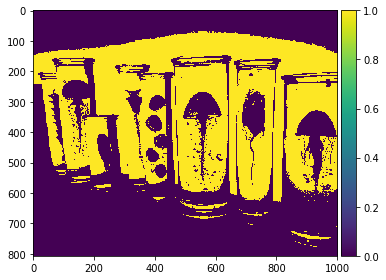

In [108]:
m3 = bright_lower(grey_img, 0.5)
imshow(m3)

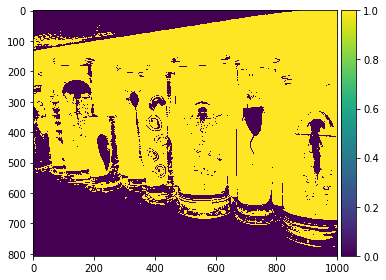

In [287]:
m4 = bright_lower(grey_img, 1)
imshow(m4)

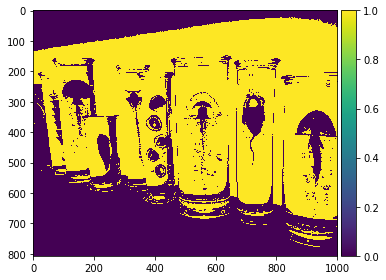

In [288]:
m5 = bright_lower(grey_img, 1.25)
imshow(m5)

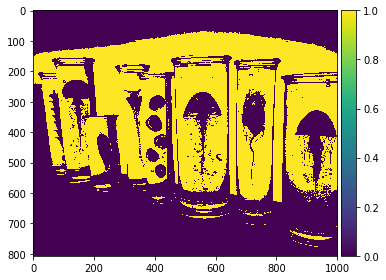

In [289]:
m6 = bright_lower(grey_img, 1.5)
imshow(m6)

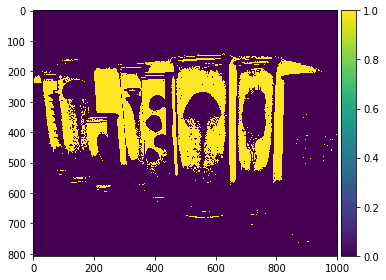

In [290]:
m7 = bright_lower(grey_img, 1.75)
imshow(m7)

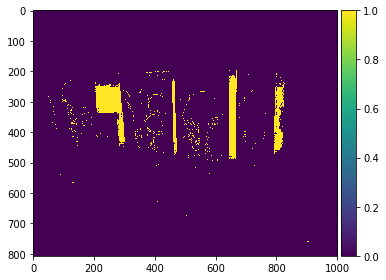

In [291]:
m8 = bright_lower(grey_img, 1.90)
imshow(m8)

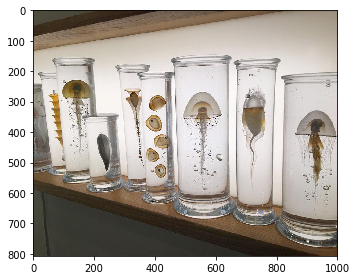

In [160]:
img4 = imread('JbYo.jpg')
imshow(img4)
img4 = img_as_ubyte(color.rgb2gray(img4))
j8 = bright_lower(img3, 256)
j7 = bright_lower(img3, 128)
j6 = bright_lower(img3, 64)
j5 = bright_lower(img3, 32)
j4 = bright_lower(img3, 16)
j3 = bright_lower(img3, 8)

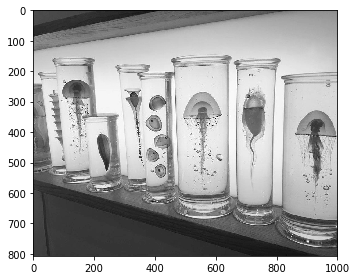

In [161]:
imshow(img4)

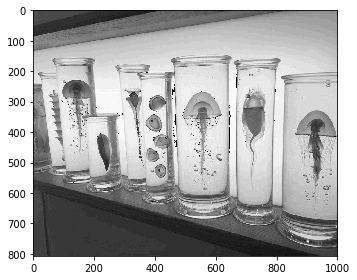

In [162]:
imshow(j3)

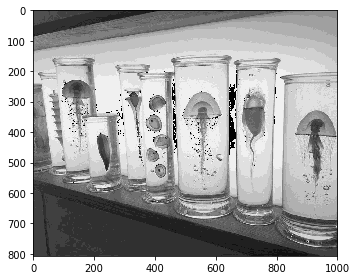

In [163]:
imshow(j4)

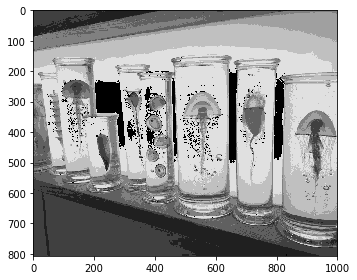

In [164]:
imshow(j5)

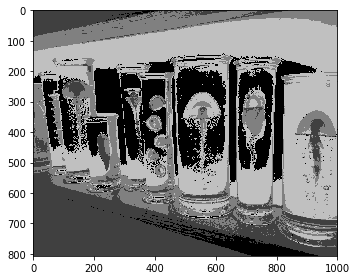

In [165]:
imshow(j6)

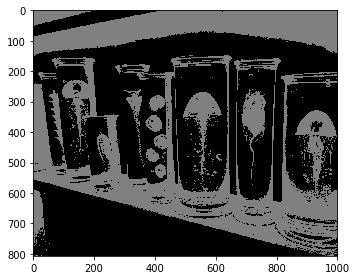

In [166]:
imshow(j7)